<a href="https://colab.research.google.com/github/rafaeldjsm/Data_Science/blob/master/SQL/trainsql.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sqlalchemy import create_engine 
from sqlalchemy import inspect
import pandas as pd

In [2]:
# download Northwind SQLite DB
!wget https://raw.githubusercontent.com/rafaeldjsm/Data_Science/master/SQL/northwind.sqlite3
!wget https://raw.githubusercontent.com/rafaeldjsm/Data_Science/master/SQL/Northwind_small.sqlite

--2022-06-22 16:10:48--  https://raw.githubusercontent.com/rafaeldjsm/Data_Science/master/SQL/northwind.sqlite3
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 804864 (786K) [application/octet-stream]
Saving to: ‘northwind.sqlite3’

northwind.sqlite3   100%[===================>] 786.00K  --.-KB/s    in 0.03s   

2022-06-22 16:10:49 (28.4 MB/s) - ‘northwind.sqlite3’ saved [804864/804864]

--2022-06-22 16:10:49--  https://raw.githubusercontent.com/rafaeldjsm/Data_Science/master/SQL/Northwind_small.sqlite
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting respons

In [3]:
# We will first load an sql extension into our environment
# This extension will allow us to work with sql on Colaboratory
#

engine2 = create_engine('sqlite:///test.db', echo=False)

%load_ext sql

%sql sqlite:///test.db

'Connected: @test.db'

In [4]:
#
%%sql 
CREATE TABLE if not exists Classmates (
    PersonID, 
    LastName, 
    FirstName, 
    Phone, 
    Residence
); 

SELECT * From Classmates;

 * sqlite:///test.db
Done.
Done.


PersonID,LastName,FirstName,Phone,Residence


In [5]:
%%sql
CREATE TABLE IF NOT EXISTS Cursos
    ("cod_curso" int, "desc_curso" varchar(15))
;
    
INSERT INTO Cursos
    ("cod_curso", "desc_curso")
VALUES
    (1, 'Informática'),
    (2, 'Eletrônica'),
    (3, 'Desenho Técnico')
;


CREATE TABLE IF NOT EXISTS Professores
    ("cod_prof" int, "desc_prof" varchar(15))
;
    
INSERT INTO Professores
    ("cod_prof", "desc_prof")
VALUES
    (1, 'Roberto Augusto'),
    (2, 'César Amador'),
    (3, 'Joice Silva')
;


CREATE TABLE IF NOT EXISTS Aulas
    ("data_aula" varchar(10), "hora_aula" varchar(5), "cod_prof" int, "cod_curso" int)
;
    
INSERT INTO Aulas
    ("data_aula", "hora_aula", "cod_prof", "cod_curso")
VALUES
    ('01/05/2018', '13:00', 1, 1),
    ('01/05/2018', '14:00', 2, 3),
    ('01/01/2018', '15:00', 3, 2)

 * sqlite:///test.db
Done.
3 rows affected.
Done.
3 rows affected.
Done.
3 rows affected.


[]

In [6]:
%%sql
SELECT a.data_aula AS "Data da Aula",a.hora_aula AS "Horário da Aula",p.desc_prof AS "Nome do Professor",c.desc_curso AS "Nome do Curso"
FROM Aulas AS a
INNER JOIN Professores AS p
ON a.cod_prof = p.cod_prof
INNER JOIN Cursos AS c
ON a.cod_curso = c.cod_curso
ORDER BY "Horário da Aula"

 * sqlite:///test.db
Done.


Data da Aula,Horário da Aula,Nome do Professor,Nome do Curso
01/05/2018,13:00,Roberto Augusto,Informática
01/05/2018,13:00,Roberto Augusto,Informática
01/05/2018,13:00,Roberto Augusto,Informática
01/05/2018,13:00,Roberto Augusto,Informática
01/05/2018,13:00,Roberto Augusto,Informática
01/05/2018,13:00,Roberto Augusto,Informática
01/05/2018,13:00,Roberto Augusto,Informática
01/05/2018,13:00,Roberto Augusto,Informática
01/05/2018,13:00,Roberto Augusto,Informática
01/05/2018,13:00,Roberto Augusto,Informática


In [7]:
%%sql

CREATE TABLE IF NOT EXISTS Fam(Name TEXT, Age INTEGER, Profession TEXT, Major TEXT);
INSERT INTO Fam (Name, Age) VALUES
('Pam', 50),
('Miranda', 32),
('Pascal', 45),
('Dave', 12),
('Emmy', 23);

UPDATE Fam SET Profession='Unknown' WHERE Profession ISNULL

 * sqlite:///test.db
Done.
5 rows affected.
5 rows affected.


[]

In [8]:
%sql SELECT * FROM Fam

 * sqlite:///test.db
Done.


Name,Age,Profession,Major
Pam,50,Unknown,None
Miranda,32,Unknown,None
Pascal,45,Unknown,None
Dave,12,Unknown,None
Emmy,23,Unknown,None
Pam,50,Unknown,None
Miranda,32,Unknown,None
Pascal,45,Unknown,None
Dave,12,Unknown,None
Emmy,23,Unknown,None


In [9]:
res = %sql SELECT * FROM Fam

df = res.DataFrame()
df

 * sqlite:///test.db
Done.


,Name,Age,Profession,Major
0,Pam,50,Unknown,None
1,Miranda,32,Unknown,None
2,Pascal,45,Unknown,None
3,Dave,12,Unknown,None
4,Emmy,23,Unknown,None
5,Pam,50,Unknown,None
6,Miranda,32,Unknown,None
7,Pascal,45,Unknown,None
8,Dave,12,Unknown,None
9,Emmy,23,Unknown,None


In [10]:
df.to_sql('products', con=engine2, if_exists='replace', index = False)

In [11]:
engine2.execute("SELECT * FROM products").fetchall()

[('Pam', 50, 'Unknown', None),
 ('Miranda', 32, 'Unknown', None),
 ('Pascal', 45, 'Unknown', None),
 ('Dave', 12, 'Unknown', None),
 ('Emmy', 23, 'Unknown', None),
 ('Pam', 50, 'Unknown', None),
 ('Miranda', 32, 'Unknown', None),
 ('Pascal', 45, 'Unknown', None),
 ('Dave', 12, 'Unknown', None),
 ('Emmy', 23, 'Unknown', None),
 ('Pam', 50, 'Unknown', None),
 ('Miranda', 32, 'Unknown', None),
 ('Pascal', 45, 'Unknown', None),
 ('Dave', 12, 'Unknown', None),
 ('Emmy', 23, 'Unknown', None)]

In [12]:
df = res.DataFrame()
df

,Name,Age,Profession,Major
0,Pam,50,Unknown,None
1,Miranda,32,Unknown,None
2,Pascal,45,Unknown,None
3,Dave,12,Unknown,None
4,Emmy,23,Unknown,None
5,Pam,50,Unknown,None
6,Miranda,32,Unknown,None
7,Pascal,45,Unknown,None
8,Dave,12,Unknown,None
9,Emmy,23,Unknown,None


In [13]:
dfbt = pd.DataFrame([[9991 ,'John', 'Liverpool'],
[9992 ,'Paul', 'Liverpool'],
[9993, 'Ringo', 'Liverpool'],
[9994,'George', 'Liverpool']], columns = ['ID', 'Name', 'Born_in'])

dfinst = pd.DataFrame([[9991 ,'Vocal' ,'Liverpool'],
[9992, 'Base' ,'Liverpool'],
[9993 ,'Drums' ,'Liverpool'],
[9995, 'Guitar', 'Arsenal'],
[9992 ,'Piano' ,'Liverpool']],columns = ['ID', 'Instrument' ,'Football_Club'])


dfbt

,ID,Name,Born_in
0,9991,John,Liverpool
1,9992,Paul,Liverpool
2,9993,Ringo,Liverpool
3,9994,George,Liverpool


In [14]:
dfbt.to_sql('A', con=engine2, if_exists='replace', index = False)
dfinst.to_sql('B', con=engine2, if_exists='replace', index = False)

In [15]:
rsq = engine2.execute('''SELECT A.ID, A.Name, A.Born_in, B.Instrument, B.Football_Club
From A
LEFT JOIN B
ON A.ID = B.ID''').fetchall()
pd.DataFrame(rsq)

,0,1,2,3,4
0,9991,John,Liverpool,Vocal,Liverpool
1,9992,Paul,Liverpool,Base,Liverpool
2,9992,Paul,Liverpool,Piano,Liverpool
3,9993,Ringo,Liverpool,Drums,Liverpool
4,9994,George,Liverpool,None,None


In [16]:
rsq

[(9991, 'John', 'Liverpool', 'Vocal', 'Liverpool'),
 (9992, 'Paul', 'Liverpool', 'Base', 'Liverpool'),
 (9992, 'Paul', 'Liverpool', 'Piano', 'Liverpool'),
 (9993, 'Ringo', 'Liverpool', 'Drums', 'Liverpool'),
 (9994, 'George', 'Liverpool', None, None)]

In [17]:
engine2.execute('SELECT * FROM A').fetchall()

[(9991, 'John', 'Liverpool'),
 (9992, 'Paul', 'Liverpool'),
 (9993, 'Ringo', 'Liverpool'),
 (9994, 'George', 'Liverpool')]

In [18]:
engine2.execute('SELECT * FROM A').fetchall()

[(9991, 'John', 'Liverpool'),
 (9992, 'Paul', 'Liverpool'),
 (9993, 'Ringo', 'Liverpool'),
 (9994, 'George', 'Liverpool')]

In [19]:
%%sql

CREATE TABLE IF NOT EXISTS Beatles
    ("ID" int, "Name" varchar(10), "Born_in" varchar(15))
;
    
INSERT INTO Beatles
    ("ID" , "Name", "Born_in")
VALUES
    (9991, 'John', 'Liverpool'),
     (9992, 'Paul', 'Liverpool'), 
     (9993, 'Ringo', 'Liverpool'), 
     (9994, 'George', 'Liverpool')
;


CREATE TABLE IF NOT EXISTS Beatles2
    ("ID" int, "Instrument" varchar(10), "Football_Club" varchar(15))
;
    
INSERT INTO Beatles2
    ("ID" , "Instrument", "Football_Club")
VALUES
    (9991, 'John', 'Liverpool'),
 (9992, 'Paul', 'Liverpool'),
 (9993, 'Ringo', 'Liverpool'),
 (9994, 'George', 'Liverpool')
;


 * sqlite:///test.db
Done.
4 rows affected.
Done.
4 rows affected.


[]

In [20]:
%sql SELECT * FROM Beatles

 * sqlite:///test.db
Done.


ID,Name,Born_in
9991,John,Liverpool
9992,Paul,Liverpool
9993,Ringo,Liverpool
9994,George,Liverpool
9991,John,Liverpool
9992,Paul,Liverpool
9993,Ringo,Liverpool
9994,George,Liverpool
9991,John,Liverpool
9992,Paul,Liverpool


In [21]:
%%sql
SELECT A.ID, A.Name, A.Born_in, B.Instrument, B.Football_Club
From Beatles AS A
LEFT JOIN Beatles2 AS B
ON A.ID = B.ID

 * sqlite:///test.db
Done.


ID,Name,Born_in,Instrument,Football_Club
9991,John,Liverpool,John,Liverpool
9991,John,Liverpool,John,Liverpool
9991,John,Liverpool,John,Liverpool
9992,Paul,Liverpool,Paul,Liverpool
9992,Paul,Liverpool,Paul,Liverpool
9992,Paul,Liverpool,Paul,Liverpool
9993,Ringo,Liverpool,Ringo,Liverpool
9993,Ringo,Liverpool,Ringo,Liverpool
9993,Ringo,Liverpool,Ringo,Liverpool
9994,George,Liverpool,George,Liverpool


In [22]:
insp = inspect(engine2)
print(insp.get_table_names())

['A', 'Aulas', 'B', 'Beatles', 'Beatles2', 'Classmates', 'Cursos', 'Fam', 'Professores', 'products']


In [23]:
# %load_ext sql

%sql sqlite:///Northwind_small.sqlite

'Connected: @Northwind_small.sqlite'

In [24]:
%%sql
SELECT sqlite_version();

 * sqlite:///Northwind_small.sqlite
   sqlite:///test.db
Done.


sqlite_version()
3.22.0


In [25]:
%%sql
SELECT name FROM sqlite_master WHERE type='table' AND name NOT LIKE 'sqlite_%';

 * sqlite:///Northwind_small.sqlite
   sqlite:///test.db
Done.


name
Employee
Category
Customer
Shipper
Supplier
Order
Product
OrderDetail
CustomerCustomerDemo
CustomerDemographic


In [26]:
%sql PRAGMA table_info([Category]);

 * sqlite:///Northwind_small.sqlite
   sqlite:///test.db
Done.


cid,name,type,notnull,dflt_value,pk
0,Id,INTEGER,0,None,1
1,CategoryName,VARCHAR(8000),0,None,0
2,Description,VARCHAR(8000),0,None,0


In [27]:
%sql PRAGMA table_info([Customer]);

 * sqlite:///Northwind_small.sqlite
   sqlite:///test.db
Done.


cid,name,type,notnull,dflt_value,pk
0,Id,VARCHAR(8000),0,None,1
1,CompanyName,VARCHAR(8000),0,None,0
2,ContactName,VARCHAR(8000),0,None,0
3,ContactTitle,VARCHAR(8000),0,None,0
4,Address,VARCHAR(8000),0,None,0
5,City,VARCHAR(8000),0,None,0
6,Region,VARCHAR(8000),0,None,0
7,PostalCode,VARCHAR(8000),0,None,0
8,Country,VARCHAR(8000),0,None,0
9,Phone,VARCHAR(8000),0,None,0


In [28]:
%sql SELECT * FROM Customer LIMIT 20

 * sqlite:///Northwind_small.sqlite
   sqlite:///test.db
Done.


Id,CompanyName,ContactName,ContactTitle,Address,City,Region,PostalCode,Country,Phone,Fax
ALFKI,Alfreds Futterkiste,Maria Anders,Sales Representative,Obere Str. 57,Berlin,Western Europe,12209,Germany,030-0074321,030-0076545
ANATR,Ana Trujillo Emparedados y helados,Ana Trujillo,Owner,Avda. de la Constitución 2222,México D.F.,Central America,05021,Mexico,(5) 555-4729,(5) 555-3745
ANTON,Antonio Moreno Taquería,Antonio Moreno,Owner,Mataderos 2312,México D.F.,Central America,05023,Mexico,(5) 555-3932,None
AROUT,Around the Horn,Thomas Hardy,Sales Representative,120 Hanover Sq.,London,British Isles,WA1 1DP,UK,(171) 555-7788,(171) 555-6750
BERGS,Berglunds snabbköp,Christina Berglund,Order Administrator,Berguvsvägen 8,Luleå,Northern Europe,S-958 22,Sweden,0921-12 34 65,0921-12 34 67
BLAUS,Blauer See Delikatessen,Hanna Moos,Sales Representative,Forsterstr. 57,Mannheim,Western Europe,68306,Germany,0621-08460,0621-08924
BLONP,Blondesddsl père et fils,Frédérique Citeaux,Marketing Manager,"24, place Kléber",Strasbourg,Western Europe,67000,France,88.60.15.31,88.60.15.32
BOLID,Bólido Comidas preparadas,Martín Sommer,Owner,"C/ Araquil, 67",Madrid,Southern Europe,28023,Spain,(91) 555 22 82,(91) 555 91 99
BONAP,Bon app,Laurence Lebihan,Owner,"12, rue des Bouchers",Marseille,Western Europe,13008,France,91.24.45.40,91.24.45.41
BOTTM,Bottom-Dollar Markets,Elizabeth Lincoln,Accounting Manager,23 Tsawassen Blvd.,Tsawassen,North America,T2F 8M4,Canada,(604) 555-4729,(604) 555-3745


In [29]:
engine = create_engine('sqlite:///Northwind_small.sqlite')

In [30]:
insp2 = inspect(engine)
print(insp2.get_table_names())

['Category', 'Customer', 'CustomerCustomerDemo', 'CustomerDemographic', 'Employee', 'EmployeeTerritory', 'Order', 'OrderDetail', 'Product', 'Region', 'Shipper', 'Supplier', 'Territory']


In [31]:
%%sql
-- find out relationships between tables using SQL command
SELECT sql
FROM sqlite_master
WHERE name = "Orders"

 * sqlite:///Northwind_small.sqlite
   sqlite:///test.db
Done.


sql


In [32]:
%sql SELECT * FROM Category

 * sqlite:///Northwind_small.sqlite
   sqlite:///test.db
Done.


Id,CategoryName,Description
1,Beverages,"Soft drinks, coffees, teas, beers, and ales"
2,Condiments,"Sweet and savory sauces, relishes, spreads, and seasonings"
3,Confections,"Desserts, candies, and sweet breads"
4,Dairy Products,Cheeses
5,Grains/Cereals,"Breads, crackers, pasta, and cereal"
6,Meat/Poultry,Prepared meats
7,Produce,Dried fruit and bean curd
8,Seafood,Seaweed and fish


In [33]:
# %sql SELECT * FROM Employee

In [34]:
%%sql
-- take a look at the Employees table first
-- use LIMIT to limit the rows being displayed
SELECT FirstName, LastName, HireDate, Title, Country
FROM Employee
-- LIMIT 100

 * sqlite:///Northwind_small.sqlite
   sqlite:///test.db
Done.


FirstName,LastName,HireDate,Title,Country
Nancy,Davolio,2024-05-01,Sales Representative,USA
Andrew,Fuller,2024-08-14,"Vice President, Sales",USA
Janet,Leverling,2024-04-01,Sales Representative,USA
Margaret,Peacock,2025-05-03,Sales Representative,USA
Steven,Buchanan,2025-10-17,Sales Manager,UK
Michael,Suyama,2025-10-17,Sales Representative,UK
Robert,King,2026-01-02,Sales Representative,UK
Laura,Callahan,2026-03-05,Inside Sales Coordinator,USA
Anne,Dodsworth,2026-11-15,Sales Representative,UK


In [35]:
# %load_ext sql

%sql sqlite:///northwind.sqlite3

'Connected: @northwind.sqlite3'

In [36]:
%%sql
SELECT sqlite_version();

   sqlite:///Northwind_small.sqlite
 * sqlite:///northwind.sqlite3
   sqlite:///test.db
Done.


sqlite_version()
3.22.0


In [37]:
%%sql
SELECT name FROM sqlite_master WHERE type='table' AND name NOT LIKE 'sqlite_%';

   sqlite:///Northwind_small.sqlite
 * sqlite:///northwind.sqlite3
   sqlite:///test.db
Done.


name
Suppliers
Shippers
Employees
Customers
Orders
Categories
Products
OrderDetails


In [38]:
%sql PRAGMA table_info([Categories]);

   sqlite:///Northwind_small.sqlite
 * sqlite:///northwind.sqlite3
   sqlite:///test.db
Done.


cid,name,type,notnull,dflt_value,pk
0,CategoryID,INTEGER,1,None,1
1,CategoryName,nvarchar(15),1,None,0
2,Description,ntext,0,None,0
3,Picture,image,0,None,0


In [39]:
%sql PRAGMA table_info([Customers]);

   sqlite:///Northwind_small.sqlite
 * sqlite:///northwind.sqlite3
   sqlite:///test.db
Done.


cid,name,type,notnull,dflt_value,pk
0,CustomerID,nchar(5),1,None,1
1,CompanyName,nvarchar(40),1,None,0
2,ContactName,nvarchar(30),0,None,0
3,ContactTitle,nvarchar(30),0,None,0
4,Address,nvarchar(60),0,None,0
5,City,nvarchar(15),0,None,0
6,Region,nvarchar(15),0,None,0
7,PostalCode,nvarchar(10),0,None,0
8,Country,nvarchar(15),0,None,0
9,Phone,nvarchar(24),0,None,0


In [40]:
%sql SELECT * FROM Customers LIMIT 20

   sqlite:///Northwind_small.sqlite
 * sqlite:///northwind.sqlite3
   sqlite:///test.db
Done.


CustomerID,CompanyName,ContactName,ContactTitle,Address,City,Region,PostalCode,Country,Phone,Fax
ALFKI,Alfreds Futterkiste,Maria Anders,Sales Representative,Obere Str. 57,Berlin,None,12209,Germany,030-0074321,030-0076545
ANATR,Ana Trujillo Emparedados y helados,Ana Trujillo,Owner,Avda. de la Constitución 2222,México D.F.,None,05021,Mexico,(5) 555-4729,(5) 555-3745
ANTON,Antonio Moreno Taquería,Antonio Moreno,Owner,Mataderos 2312,México D.F.,None,05023,Mexico,(5) 555-3932,None
AROUT,Around the Horn,Thomas Hardy,Sales Representative,120 Hanover Sq.,London,None,WA1 1DP,UK,(171) 555-7788,(171) 555-6750
BERGS,Berglunds snabbköp,Christina Berglund,Order Administrator,Berguvsvägen 8,Luleå,None,S-958 22,Sweden,0921-12 34 65,0921-12 34 67
BLAUS,Blauer See Delikatessen,Hanna Moos,Sales Representative,Forsterstr. 57,Mannheim,None,68306,Germany,0621-08460,0621-08924
BLONP,Blondesddsl père et fils,Frédérique Citeaux,Marketing Manager,"24, place Kléber",Strasbourg,None,67000,France,88.60.15.31,88.60.15.32
BOLID,Bólido Comidas preparadas,Martín Sommer,Owner,"C/ Araquil, 67",Madrid,None,28023,Spain,(91) 555 22 82,(91) 555 91 99
BONAP,Bon app',Laurence Lebihan,Owner,"12, rue des Bouchers",Marseille,None,13008,France,91.24.45.40,91.24.45.41
BOTTM,Bottom-Dollar Markets,Elizabeth Lincoln,Accounting Manager,23 Tsawassen Blvd.,Tsawassen,BC,T2F 8M4,Canada,(604) 555-4729,(604) 555-3745


In [41]:
engine = create_engine('sqlite:///northwind.sqlite3')

In [42]:
insp2 = inspect(engine)
print(insp2.get_table_names())

['Categories', 'Customers', 'Employees', 'OrderDetails', 'Orders', 'Products', 'Shippers', 'Suppliers', 'sqlite_sequence']


In [43]:
%%sql
-- find out relationships between tables using SQL command
SELECT sql
FROM sqlite_master
WHERE name = "Orders"

   sqlite:///Northwind_small.sqlite
 * sqlite:///northwind.sqlite3
   sqlite:///test.db
Done.


sql
"CREATE TABLE [Orders] ( [OrderID] INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL, [CustomerID] nchar(5) NOT NULL COLLATE NOCASE, [EmployeeID] int NULL, [OrderDate] datetime NULL, [RequiredDate] datetime NULL, [ShippedDate] datetime NULL, [ShipVia] int NULL, [Freight] money DEFAULT 0 NULL, [ShipName] nvarchar(40) NULL COLLATE NOCASE, [ShipAddress] nvarchar(60) NULL COLLATE NOCASE, [ShipCity] nvarchar(15) NULL COLLATE NOCASE, [ShipRegion] nvarchar(15) NULL COLLATE NOCASE, [ShipPostalCode] nvarchar(10) NULL COLLATE NOCASE, [ShipCountry] nvarchar(15) NULL COLLATE NOCASE, CONSTRAINT [FK_Orders_Customers] FOREIGN KEY ([CustomerID]) REFERENCES [Customers] ([CustomerID]) ON DELETE NO ACTION ON UPDATE NO ACTION, CONSTRAINT [FK_Orders_Employees] FOREIGN KEY ([EmployeeID]) REFERENCES [Employees] ([EmployeeID]) ON DELETE NO ACTION ON UPDATE NO ACTION, CONSTRAINT [FK_Orders_Shippers] FOREIGN KEY ([ShipVia]) REFERENCES [Shippers] ([ShipperID]) ON DELETE NO ACTION ON UPDATE NO ACTION)"


In [44]:
# Just curious, what's in the picture column?
result = %sql SELECT CategoryName, Picture FROM Categories;
# result.DataFrame().loc[0, 'Picture']

   sqlite:///Northwind_small.sqlite
 * sqlite:///northwind.sqlite3
   sqlite:///test.db
Done.


In [45]:
# %sql SELECT * FROM Categories LIMIT 1

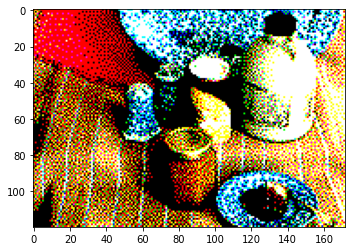

In [46]:
# still curious about the picture column?
# image is actually stored as a blob (Binary Large Object) in SQLite
from matplotlib.pyplot import imshow
from PIL import Image
from io import BytesIO
%matplotlib inline
row = 1
im = Image.open(BytesIO(result.DataFrame().loc[row, 'Picture'][78:])) # cut the first 78 bytes (OLE header)
# print(im)
imshow(im);

   sqlite:///Northwind_small.sqlite
 * sqlite:///northwind.sqlite3
   sqlite:///test.db
Done.


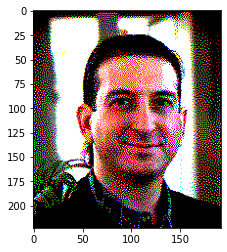

In [47]:
result = %sql SELECT Extension,Photo FROM Employees;
row = 4
im = Image.open(BytesIO(result.DataFrame().loc[row,'Photo'][78:])) # cut the first 78 bytes (OLE header)
# print(im)
imshow(im);

In [48]:
lemp = %sql PRAGMA table_info(Employees)
lemp

   sqlite:///Northwind_small.sqlite
 * sqlite:///northwind.sqlite3
   sqlite:///test.db
Done.


cid,name,type,notnull,dflt_value,pk
0,EmployeeID,INTEGER,1,None,1
1,LastName,nvarchar(20),1,None,0
2,FirstName,nvarchar(10),1,None,0
3,Title,nvarchar(30),0,None,0
4,TitleOfCourtesy,nvarchar(25),0,None,0
5,BirthDate,datetime,0,None,0
6,HireDate,datetime,0,None,0
7,Address,nvarchar(60),0,None,0
8,City,nvarchar(15),0,None,0
9,Region,nvarchar(15),0,None,0


In [49]:
type(lemp)

sql.run.ResultSet

In [50]:
# %sql SELECT * FROM Employees LIMIT 2

In [51]:
%%sql
-- take a look at the Employees table first
-- use LIMIT to limit the rows being displayed
SELECT FirstName, LastName, HireDate, Title, Country
FROM Employees
-- LIMIT 100

   sqlite:///Northwind_small.sqlite
 * sqlite:///northwind.sqlite3
   sqlite:///test.db
Done.


FirstName,LastName,HireDate,Title,Country
Nancy,Davolio,2010-05-01 00:00:00.000,Sales Representative,USA
Andrew,Fuller,2010-08-14 00:00:00.000,"Vice President, Sales",USA
Janet,Leverling,2010-04-01 00:00:00.000,Sales Representative,USA
Margaret,Peacock,2011-05-03 00:00:00.000,Sales Representative,USA
Steven,Buchanan,2011-10-17 00:00:00.000,Sales Manager,UK
Michael,Suyama,2011-10-17 00:00:00.000,Sales Representative,UK
Robert,King,2012-01-02 00:00:00.000,Sales Representative,UK
Laura,Callahan,2012-03-05 00:00:00.000,Inside Sales Coordinator,USA
Anne,Dodsworth,2012-11-15 00:00:00.000,Sales Representative,UK


In [52]:
%sql SELECT COUNT(DISTINCT Country) FROM Customers;

   sqlite:///Northwind_small.sqlite
 * sqlite:///northwind.sqlite3
   sqlite:///test.db
Done.


COUNT(DISTINCT Country)
21


In [53]:
%sql SELECT COUNT(*) ,Country FROM Customers GROUP BY Country

   sqlite:///Northwind_small.sqlite
 * sqlite:///northwind.sqlite3
   sqlite:///test.db
Done.


COUNT(*),Country
3,Argentina
2,Austria
2,Belgium
9,Brazil
3,Canada
2,Denmark
2,Finland
11,France
11,Germany
1,Ireland


In [54]:
%sql SELECT * FROM Customers WHERE Country="Mexico";

   sqlite:///Northwind_small.sqlite
 * sqlite:///northwind.sqlite3
   sqlite:///test.db
Done.


CustomerID,CompanyName,ContactName,ContactTitle,Address,City,Region,PostalCode,Country,Phone,Fax
ANATR,Ana Trujillo Emparedados y helados,Ana Trujillo,Owner,Avda. de la Constitución 2222,México D.F.,None,05021,Mexico,(5) 555-4729,(5) 555-3745
ANTON,Antonio Moreno Taquería,Antonio Moreno,Owner,Mataderos 2312,México D.F.,None,05023,Mexico,(5) 555-3932,None
CENTC,Centro comercial Moctezuma,Francisco Chang,Marketing Manager,Sierras de Granada 9993,México D.F.,None,05022,Mexico,(5) 555-3392,(5) 555-7293
PERIC,Pericles Comidas clásicas,Guillermo Fernández,Sales Representative,Calle Dr. Jorge Cash 321,México D.F.,None,05033,Mexico,(5) 552-3745,(5) 545-3745
TORTU,Tortuga Restaurante,Miguel Angel Paolino,Owner,Avda. Azteca 123,México D.F.,None,05033,Mexico,(5) 555-2933,None


In [55]:
%sql SELECT * FROM Customers WHERE Country LIKE "%Ger%";

   sqlite:///Northwind_small.sqlite
 * sqlite:///northwind.sqlite3
   sqlite:///test.db
Done.


CustomerID,CompanyName,ContactName,ContactTitle,Address,City,Region,PostalCode,Country,Phone,Fax
ALFKI,Alfreds Futterkiste,Maria Anders,Sales Representative,Obere Str. 57,Berlin,None,12209,Germany,030-0074321,030-0076545
BLAUS,Blauer See Delikatessen,Hanna Moos,Sales Representative,Forsterstr. 57,Mannheim,None,68306,Germany,0621-08460,0621-08924
DRACD,Drachenblut Delikatessen,Sven Ottlieb,Order Administrator,Walserweg 21,Aachen,None,52066,Germany,0241-039123,0241-059428
FRANK,Frankenversand,Peter Franken,Marketing Manager,Berliner Platz 43,München,None,80805,Germany,089-0877310,089-0877451
KOENE,Königlich Essen,Philip Cramer,Sales Associate,Maubelstr. 90,Brandenburg,None,14776,Germany,0555-09876,None
LEHMS,Lehmanns Marktstand,Renate Messner,Sales Representative,Magazinweg 7,Frankfurt a.M.,None,60528,Germany,069-0245984,069-0245874
MORGK,Morgenstern Gesundkost,Alexander Feuer,Marketing Assistant,Heerstr. 22,Leipzig,None,04179,Germany,0342-023176,None
OTTIK,Ottilies Käseladen,Henriette Pfalzheim,Owner,Mehrheimerstr. 369,Köln,None,50739,Germany,0221-0644327,0221-0765721
QUICK,QUICK-Stop,Horst Kloss,Accounting Manager,Taucherstraße 10,Cunewalde,None,01307,Germany,0372-035188,None
TOMSP,Toms Spezialitäten,Karin Josephs,Marketing Manager,Luisenstr. 48,Münster,None,44087,Germany,0251-031259,0251-035695


In [56]:
%sql SELECT CompanyName, City FROM Customers LIMIT 25;

   sqlite:///Northwind_small.sqlite
 * sqlite:///northwind.sqlite3
   sqlite:///test.db
Done.


CompanyName,City
Alfreds Futterkiste,Berlin
Ana Trujillo Emparedados y helados,México D.F.
Antonio Moreno Taquería,México D.F.
Around the Horn,London
Berglunds snabbköp,Luleå
Blauer See Delikatessen,Mannheim
Blondesddsl père et fils,Strasbourg
Bólido Comidas preparadas,Madrid
Bon app',Marseille
Bottom-Dollar Markets,Tsawassen


In [57]:
%%sql
SELECT * FROM Customers
WHERE City LIKE 's%';

   sqlite:///Northwind_small.sqlite
 * sqlite:///northwind.sqlite3
   sqlite:///test.db
Done.


CustomerID,CompanyName,ContactName,ContactTitle,Address,City,Region,PostalCode,Country,Phone,Fax
PICCO,Piccolo und mehr,Georg Pipps,Sales Manager,Geislweg 14,Salzburg,None,5020,Austria,6562-9722,6562-9723
HILAA,HILARION-Abastos,Carlos Hernández,Sales Representative,Carrera 22 con Ave. Carlos Soublette #8-35,San Cristóbal,Táchira,5022,Venezuela,(5) 555-1340,(5) 555-1948
LETSS,Let's Stop N Shop,Jaime Yorres,Owner,87 Polk St. Suite 5,San Francisco,CA,94117,USA,(415) 555-5938,None
COMMI,Comércio Mineiro,Pedro Afonso,Sales Associate,"Av. dos Lusíadas, 23",Sao Paulo,SP,05432-043,Brazil,(11) 555-7647,None
FAMIA,Familia Arquibaldo,Aria Cruz,Marketing Assistant,"Rua Orós, 92",Sao Paulo,SP,05442-030,Brazil,(11) 555-9857,None
QUEEN,Queen Cozinha,Lúcia Carvalho,Marketing Assistant,"Alameda dos Canàrios, 891",Sao Paulo,SP,05487-020,Brazil,(11) 555-1189,None
TRADH,Tradição Hipermercados,Anabela Domingues,Sales Representative,"Av. Inês de Castro, 414",Sao Paulo,SP,05634-030,Brazil,(11) 555-2167,(11) 555-2168
WHITC,White Clover Markets,Karl Jablonski,Owner,305 - 14th Ave. S. Suite 3B,Seattle,WA,98128,USA,(206) 555-4112,(206) 555-4115
GODOS,Godos Cocina Típica,José Pedro Freyre,Sales Manager,"C/ Romero, 33",Sevilla,None,41101,Spain,(95) 555 82 82,None
SANTG,Santé Gourmet,Jonas Bergulfsen,Owner,Erling Skakkes gate 78,Stavern,None,4110,Norway,07-98 92 35,07-98 92 47


In [58]:
%sql PRAGMA table_info(Products)

   sqlite:///Northwind_small.sqlite
 * sqlite:///northwind.sqlite3
   sqlite:///test.db
Done.


cid,name,type,notnull,dflt_value,pk
0,ProductID,INTEGER,1,None,1
1,ProductName,nvarchar(40),1,None,0
2,SupplierID,int,0,None,0
3,CategoryID,int,0,None,0
4,QuantityPerUnit,nvarchar(20),0,None,0
5,UnitPrice,money,0,0,0
6,UnitsInStock,smallint,0,0,0
7,UnitsOnOrder,smallint,0,0,0
8,ReorderLevel,smallint,0,0,0
9,Discontinued,bit,1,0,0


In [59]:
%%sql
SELECT * FROM Products
WHERE UnitPrice BETWEEN 50 AND 60;

   sqlite:///Northwind_small.sqlite
 * sqlite:///northwind.sqlite3
   sqlite:///test.db
Done.


ProductID,ProductName,SupplierID,CategoryID,QuantityPerUnit,UnitPrice,UnitsInStock,UnitsOnOrder,ReorderLevel,Discontinued
51,Manjimup Dried Apples,24,7,50 - 300 g pkgs.,53,20,0,10,0
59,Raclette Courdavault,28,4,5 kg pkg.,55,79,0,0,0


In [60]:
%%sql
SELECT * FROM Customers
WHERE Country='Germany' AND City='Berlin';

   sqlite:///Northwind_small.sqlite
 * sqlite:///northwind.sqlite3
   sqlite:///test.db
Done.


CustomerID,CompanyName,ContactName,ContactTitle,Address,City,Region,PostalCode,Country,Phone,Fax
ALFKI,Alfreds Futterkiste,Maria Anders,Sales Representative,Obere Str. 57,Berlin,None,12209,Germany,030-0074321,030-0076545


In [61]:
%%sql

INSERT INTO Customers (CustomerID,CompanyName,	ContactName,Address,City,PostalCode,Country)
VALUES (1,'Cardinal', 'Tom B. Erichsen', 'Skagen 21', 'Stavanger', '4006', 'Norway');

   sqlite:///Northwind_small.sqlite
 * sqlite:///northwind.sqlite3
   sqlite:///test.db
1 rows affected.


[]

In [62]:
%sql SELECT * FROM Customers ORDER BY CustomerID LIMIT 2

   sqlite:///Northwind_small.sqlite
 * sqlite:///northwind.sqlite3
   sqlite:///test.db
Done.


CustomerID,CompanyName,ContactName,ContactTitle,Address,City,Region,PostalCode,Country,Phone,Fax
1,Cardinal,Tom B. Erichsen,None,Skagen 21,Stavanger,None,4006,Norway,None,None
ALFKI,Alfreds Futterkiste,Maria Anders,Sales Representative,Obere Str. 57,Berlin,None,12209,Germany,030-0074321,030-0076545


In [63]:
%sql SELECT * FROM Customers LIMIT -2

   sqlite:///Northwind_small.sqlite
 * sqlite:///northwind.sqlite3
   sqlite:///test.db
Done.


CustomerID,CompanyName,ContactName,ContactTitle,Address,City,Region,PostalCode,Country,Phone,Fax
ALFKI,Alfreds Futterkiste,Maria Anders,Sales Representative,Obere Str. 57,Berlin,None,12209,Germany,030-0074321,030-0076545
ANATR,Ana Trujillo Emparedados y helados,Ana Trujillo,Owner,Avda. de la Constitución 2222,México D.F.,None,05021,Mexico,(5) 555-4729,(5) 555-3745
ANTON,Antonio Moreno Taquería,Antonio Moreno,Owner,Mataderos 2312,México D.F.,None,05023,Mexico,(5) 555-3932,None
AROUT,Around the Horn,Thomas Hardy,Sales Representative,120 Hanover Sq.,London,None,WA1 1DP,UK,(171) 555-7788,(171) 555-6750
BERGS,Berglunds snabbköp,Christina Berglund,Order Administrator,Berguvsvägen 8,Luleå,None,S-958 22,Sweden,0921-12 34 65,0921-12 34 67
BLAUS,Blauer See Delikatessen,Hanna Moos,Sales Representative,Forsterstr. 57,Mannheim,None,68306,Germany,0621-08460,0621-08924
BLONP,Blondesddsl père et fils,Frédérique Citeaux,Marketing Manager,"24, place Kléber",Strasbourg,None,67000,France,88.60.15.31,88.60.15.32
BOLID,Bólido Comidas preparadas,Martín Sommer,Owner,"C/ Araquil, 67",Madrid,None,28023,Spain,(91) 555 22 82,(91) 555 91 99
BONAP,Bon app',Laurence Lebihan,Owner,"12, rue des Bouchers",Marseille,None,13008,France,91.24.45.40,91.24.45.41
BOTTM,Bottom-Dollar Markets,Elizabeth Lincoln,Accounting Manager,23 Tsawassen Blvd.,Tsawassen,BC,T2F 8M4,Canada,(604) 555-4729,(604) 555-3745


In [64]:
%%sql

UPDATE Customers
SET ContactName = 'Alfred Schmidt', City= 'Frankfurt'
WHERE CustomerID = "ALFKI";

   sqlite:///Northwind_small.sqlite
 * sqlite:///northwind.sqlite3
   sqlite:///test.db
1 rows affected.


[]

In [65]:
%sql SELECT * FROM Customers LIMIT 2

   sqlite:///Northwind_small.sqlite
 * sqlite:///northwind.sqlite3
   sqlite:///test.db
Done.


CustomerID,CompanyName,ContactName,ContactTitle,Address,City,Region,PostalCode,Country,Phone,Fax
ALFKI,Alfreds Futterkiste,Alfred Schmidt,Sales Representative,Obere Str. 57,Frankfurt,None,12209,Germany,030-0074321,030-0076545
ANATR,Ana Trujillo Emparedados y helados,Ana Trujillo,Owner,Avda. de la Constitución 2222,México D.F.,None,05021,Mexico,(5) 555-4729,(5) 555-3745


In [66]:
%%sql

UPDATE Customers
SET ContactName='Juan'
WHERE Country='Mexico';

   sqlite:///Northwind_small.sqlite
 * sqlite:///northwind.sqlite3
   sqlite:///test.db
5 rows affected.


[]

In [67]:
%sql SELECT * FROM Customers-- WHERE NOT Country="Mexico";

   sqlite:///Northwind_small.sqlite
 * sqlite:///northwind.sqlite3
   sqlite:///test.db
Done.


CustomerID,CompanyName,ContactName,ContactTitle,Address,City,Region,PostalCode,Country,Phone,Fax
ALFKI,Alfreds Futterkiste,Alfred Schmidt,Sales Representative,Obere Str. 57,Frankfurt,None,12209,Germany,030-0074321,030-0076545
ANATR,Ana Trujillo Emparedados y helados,Juan,Owner,Avda. de la Constitución 2222,México D.F.,None,05021,Mexico,(5) 555-4729,(5) 555-3745
ANTON,Antonio Moreno Taquería,Juan,Owner,Mataderos 2312,México D.F.,None,05023,Mexico,(5) 555-3932,None
AROUT,Around the Horn,Thomas Hardy,Sales Representative,120 Hanover Sq.,London,None,WA1 1DP,UK,(171) 555-7788,(171) 555-6750
BERGS,Berglunds snabbköp,Christina Berglund,Order Administrator,Berguvsvägen 8,Luleå,None,S-958 22,Sweden,0921-12 34 65,0921-12 34 67
BLAUS,Blauer See Delikatessen,Hanna Moos,Sales Representative,Forsterstr. 57,Mannheim,None,68306,Germany,0621-08460,0621-08924
BLONP,Blondesddsl père et fils,Frédérique Citeaux,Marketing Manager,"24, place Kléber",Strasbourg,None,67000,France,88.60.15.31,88.60.15.32
BOLID,Bólido Comidas preparadas,Martín Sommer,Owner,"C/ Araquil, 67",Madrid,None,28023,Spain,(91) 555 22 82,(91) 555 91 99
BONAP,Bon app',Laurence Lebihan,Owner,"12, rue des Bouchers",Marseille,None,13008,France,91.24.45.40,91.24.45.41
BOTTM,Bottom-Dollar Markets,Elizabeth Lincoln,Accounting Manager,23 Tsawassen Blvd.,Tsawassen,BC,T2F 8M4,Canada,(604) 555-4729,(604) 555-3745


In [68]:
%%sql

UPDATE Customers
SET ContactName='Juan';

   sqlite:///Northwind_small.sqlite
 * sqlite:///northwind.sqlite3
   sqlite:///test.db
92 rows affected.


[]

In [69]:
%sql DELETE FROM Customers WHERE CompanyName='Alfreds Futterkiste';

   sqlite:///Northwind_small.sqlite
 * sqlite:///northwind.sqlite3
   sqlite:///test.db
1 rows affected.


[]

In [70]:
# %sql DELETE FROM Customers;

In [71]:
# SQL statement deletes all rows in the "Customers" table, without deleting the table:

%sql select * from Customers;

   sqlite:///Northwind_small.sqlite
 * sqlite:///northwind.sqlite3
   sqlite:///test.db
Done.


CustomerID,CompanyName,ContactName,ContactTitle,Address,City,Region,PostalCode,Country,Phone,Fax
ANATR,Ana Trujillo Emparedados y helados,Juan,Owner,Avda. de la Constitución 2222,México D.F.,None,05021,Mexico,(5) 555-4729,(5) 555-3745
ANTON,Antonio Moreno Taquería,Juan,Owner,Mataderos 2312,México D.F.,None,05023,Mexico,(5) 555-3932,None
AROUT,Around the Horn,Juan,Sales Representative,120 Hanover Sq.,London,None,WA1 1DP,UK,(171) 555-7788,(171) 555-6750
BERGS,Berglunds snabbköp,Juan,Order Administrator,Berguvsvägen 8,Luleå,None,S-958 22,Sweden,0921-12 34 65,0921-12 34 67
BLAUS,Blauer See Delikatessen,Juan,Sales Representative,Forsterstr. 57,Mannheim,None,68306,Germany,0621-08460,0621-08924
BLONP,Blondesddsl père et fils,Juan,Marketing Manager,"24, place Kléber",Strasbourg,None,67000,France,88.60.15.31,88.60.15.32
BOLID,Bólido Comidas preparadas,Juan,Owner,"C/ Araquil, 67",Madrid,None,28023,Spain,(91) 555 22 82,(91) 555 91 99
BONAP,Bon app',Juan,Owner,"12, rue des Bouchers",Marseille,None,13008,France,91.24.45.40,91.24.45.41
BOTTM,Bottom-Dollar Markets,Juan,Accounting Manager,23 Tsawassen Blvd.,Tsawassen,BC,T2F 8M4,Canada,(604) 555-4729,(604) 555-3745
BSBEV,B's Beverages,Juan,Sales Representative,Fauntleroy Circus,London,None,EC2 5NT,UK,(171) 555-1212,None


In [72]:
%%sql
SELECT name FROM sqlite_master WHERE type='table' AND name NOT LIKE 'sqlite_%';

   sqlite:///Northwind_small.sqlite
 * sqlite:///northwind.sqlite3
   sqlite:///test.db
Done.


name
Suppliers
Shippers
Employees
Customers
Orders
Categories
Products
OrderDetails


In [73]:
%sql SELECT TOP 3 * FROM Customers;

   sqlite:///Northwind_small.sqlite
 * sqlite:///northwind.sqlite3
   sqlite:///test.db
(sqlite3.OperationalError) near "3": syntax error
[SQL: SELECT TOP 3 * FROM Customers;]
(Background on this error at: https://sqlalche.me/e/14/e3q8)


In [74]:
%sql SELECT * FROM Customers;

   sqlite:///Northwind_small.sqlite
 * sqlite:///northwind.sqlite3
   sqlite:///test.db
Done.


CustomerID,CompanyName,ContactName,ContactTitle,Address,City,Region,PostalCode,Country,Phone,Fax
ANATR,Ana Trujillo Emparedados y helados,Juan,Owner,Avda. de la Constitución 2222,México D.F.,None,05021,Mexico,(5) 555-4729,(5) 555-3745
ANTON,Antonio Moreno Taquería,Juan,Owner,Mataderos 2312,México D.F.,None,05023,Mexico,(5) 555-3932,None
AROUT,Around the Horn,Juan,Sales Representative,120 Hanover Sq.,London,None,WA1 1DP,UK,(171) 555-7788,(171) 555-6750
BERGS,Berglunds snabbköp,Juan,Order Administrator,Berguvsvägen 8,Luleå,None,S-958 22,Sweden,0921-12 34 65,0921-12 34 67
BLAUS,Blauer See Delikatessen,Juan,Sales Representative,Forsterstr. 57,Mannheim,None,68306,Germany,0621-08460,0621-08924
BLONP,Blondesddsl père et fils,Juan,Marketing Manager,"24, place Kléber",Strasbourg,None,67000,France,88.60.15.31,88.60.15.32
BOLID,Bólido Comidas preparadas,Juan,Owner,"C/ Araquil, 67",Madrid,None,28023,Spain,(91) 555 22 82,(91) 555 91 99
BONAP,Bon app',Juan,Owner,"12, rue des Bouchers",Marseille,None,13008,France,91.24.45.40,91.24.45.41
BOTTM,Bottom-Dollar Markets,Juan,Accounting Manager,23 Tsawassen Blvd.,Tsawassen,BC,T2F 8M4,Canada,(604) 555-4729,(604) 555-3745
BSBEV,B's Beverages,Juan,Sales Representative,Fauntleroy Circus,London,None,EC2 5NT,UK,(171) 555-1212,None


In [75]:
%sql SELECT TOP 50 PERCENT * FROM Customers;

   sqlite:///Northwind_small.sqlite
 * sqlite:///northwind.sqlite3
   sqlite:///test.db
(sqlite3.OperationalError) near "50": syntax error
[SQL: SELECT TOP 50 PERCENT * FROM Customers;]
(Background on this error at: https://sqlalche.me/e/14/e3q8)


In [78]:
%%sql

SELECT MIN(UnitPrice) AS SmallestPrice
FROM Products;

   sqlite:///Northwind_small.sqlite
 * sqlite:///northwind.sqlite3
   sqlite:///test.db
Done.


SmallestPrice
2.5


In [79]:
%%sql

SELECT MAX(UnitPrice) AS LargestPrice
FROM Products;

   sqlite:///Northwind_small.sqlite
 * sqlite:///northwind.sqlite3
   sqlite:///test.db
Done.


LargestPrice
263.5


In [81]:
%sql PRAGMA table_info(Products)

   sqlite:///Northwind_small.sqlite
 * sqlite:///northwind.sqlite3
   sqlite:///test.db
Done.


cid,name,type,notnull,dflt_value,pk
0,ProductID,INTEGER,1,None,1
1,ProductName,nvarchar(40),1,None,0
2,SupplierID,int,0,None,0
3,CategoryID,int,0,None,0
4,QuantityPerUnit,nvarchar(20),0,None,0
5,UnitPrice,money,0,0,0
6,UnitsInStock,smallint,0,0,0
7,UnitsOnOrder,smallint,0,0,0
8,ReorderLevel,smallint,0,0,0
9,Discontinued,bit,1,0,0


In [83]:
%%sql

SELECT COUNT(CategoryID)
FROM Products;

   sqlite:///Northwind_small.sqlite
 * sqlite:///northwind.sqlite3
   sqlite:///test.db
Done.


COUNT(CategoryID)
77


In [85]:
%%sql

SELECT * FROM Customers
WHERE CompanyName LIKE 'a%';

   sqlite:///Northwind_small.sqlite
 * sqlite:///northwind.sqlite3
   sqlite:///test.db
Done.


CustomerID,CompanyName,ContactName,ContactTitle,Address,City,Region,PostalCode,Country,Phone,Fax
ANATR,Ana Trujillo Emparedados y helados,Juan,Owner,Avda. de la Constitución 2222,México D.F.,None,05021,Mexico,(5) 555-4729,(5) 555-3745
ANTON,Antonio Moreno Taquería,Juan,Owner,Mataderos 2312,México D.F.,None,05023,Mexico,(5) 555-3932,None
AROUT,Around the Horn,Juan,Sales Representative,120 Hanover Sq.,London,None,WA1 1DP,UK,(171) 555-7788,(171) 555-6750


In [86]:
%%sql

--CustomerName ending with "a"

SELECT * FROM Customers
WHERE CompanyName LIKE '%a';

   sqlite:///Northwind_small.sqlite
 * sqlite:///northwind.sqlite3
   sqlite:///test.db
Done.


CustomerID,CompanyName,ContactName,ContactTitle,Address,City,Region,PostalCode,Country,Phone,Fax
ANTON,Antonio Moreno Taquería,Juan,Owner,Mataderos 2312,México D.F.,None,05023,Mexico,(5) 555-3932,None
CENTC,Centro comercial Moctezuma,Juan,Marketing Manager,Sierras de Granada 9993,México D.F.,None,05022,Mexico,(5) 555-3392,(5) 555-7293
GODOS,Godos Cocina Típica,Juan,Sales Manager,"C/ Romero, 33",Sevilla,None,41101,Spain,(95) 555 82 82,None
QUEDE,Que Delícia,Juan,Accounting Manager,"Rua da Panificadora, 12",Rio de Janeiro,RJ,02389-673,Brazil,(21) 555-4252,(21) 555-4545
QUEEN,Queen Cozinha,Juan,Marketing Assistant,"Alameda dos Canàrios, 891",Sao Paulo,SP,05487-020,Brazil,(11) 555-1189,None
WELLI,Wellington Importadora,Juan,Sales Manager,"Rua do Mercado, 12",Resende,SP,08737-363,Brazil,(14) 555-8122,None
WILMK,Wilman Kala,Juan,Owner/Marketing Assistant,Keskuskatu 45,Helsinki,None,21240,Finland,90-224 8858,90-224 8858


In [102]:
%%sql

SELECT * FROM Customers
WHERE City LIKE '_ondon';

   sqlite:///Northwind_small.sqlite
 * sqlite:///northwind.sqlite3
   sqlite:///test.db
Done.


CustomerID,CompanyName,ContactName,ContactTitle,Address,City,Region,PostalCode,Country,Phone,Fax
AROUT,Around the Horn,Juan,Sales Representative,120 Hanover Sq.,London,None,WA1 1DP,UK,(171) 555-7788,(171) 555-6750
BSBEV,B's Beverages,Juan,Sales Representative,Fauntleroy Circus,London,None,EC2 5NT,UK,(171) 555-1212,None
CONSH,Consolidated Holdings,Juan,Sales Representative,Berkeley Gardens 12 Brewery,London,None,WX1 6LT,UK,(171) 555-2282,(171) 555-9199
EASTC,Eastern Connection,Juan,Sales Agent,35 King George,London,None,WX3 6FW,UK,(171) 555-0297,(171) 555-3373
NORTS,North/South,Juan,Sales Associate,South House 300 Queensbridge,London,None,SW7 1RZ,UK,(171) 555-7733,(171) 555-2530
SEVES,Seven Seas Imports,Juan,Sales Manager,90 Wadhurst Rd.,London,None,OX15 4NB,UK,(171) 555-1717,(171) 555-5646


In [112]:
# City starnt is an "M" or a "L" or an "R".

%%sql

SELECT * FROM Customers
WHERE SUBSTR(City, 1, 1) IN ('M','L','R');

   sqlite:///Northwind_small.sqlite
 * sqlite:///northwind.sqlite3
   sqlite:///test.db
Done.


CustomerID,CompanyName,ContactName,ContactTitle,Address,City,Region,PostalCode,Country,Phone,Fax
ANATR,Ana Trujillo Emparedados y helados,Juan,Owner,Avda. de la Constitución 2222,México D.F.,None,05021,Mexico,(5) 555-4729,(5) 555-3745
ANTON,Antonio Moreno Taquería,Juan,Owner,Mataderos 2312,México D.F.,None,05023,Mexico,(5) 555-3932,None
AROUT,Around the Horn,Juan,Sales Representative,120 Hanover Sq.,London,None,WA1 1DP,UK,(171) 555-7788,(171) 555-6750
BERGS,Berglunds snabbköp,Juan,Order Administrator,Berguvsvägen 8,Luleå,None,S-958 22,Sweden,0921-12 34 65,0921-12 34 67
BLAUS,Blauer See Delikatessen,Juan,Sales Representative,Forsterstr. 57,Mannheim,None,68306,Germany,0621-08460,0621-08924
BOLID,Bólido Comidas preparadas,Juan,Owner,"C/ Araquil, 67",Madrid,None,28023,Spain,(91) 555 22 82,(91) 555 91 99
BONAP,Bon app',Juan,Owner,"12, rue des Bouchers",Marseille,None,13008,France,91.24.45.40,91.24.45.41
BSBEV,B's Beverages,Juan,Sales Representative,Fauntleroy Circus,London,None,EC2 5NT,UK,(171) 555-1212,None
CENTC,Centro comercial Moctezuma,Juan,Marketing Manager,Sierras de Granada 9993,México D.F.,None,05022,Mexico,(5) 555-3392,(5) 555-7293
CONSH,Consolidated Holdings,Juan,Sales Representative,Berkeley Gardens 12 Brewery,London,None,WX1 6LT,UK,(171) 555-2282,(171) 555-9199


In [100]:
%%sql
SELECT * FROM Customers

   sqlite:///Northwind_small.sqlite
 * sqlite:///northwind.sqlite3
   sqlite:///test.db
Done.


CustomerID,CompanyName,ContactName,ContactTitle,Address,City,Region,PostalCode,Country,Phone,Fax
ANATR,Ana Trujillo Emparedados y helados,Juan,Owner,Avda. de la Constitución 2222,México D.F.,None,05021,Mexico,(5) 555-4729,(5) 555-3745
ANTON,Antonio Moreno Taquería,Juan,Owner,Mataderos 2312,México D.F.,None,05023,Mexico,(5) 555-3932,None
AROUT,Around the Horn,Juan,Sales Representative,120 Hanover Sq.,London,None,WA1 1DP,UK,(171) 555-7788,(171) 555-6750
BERGS,Berglunds snabbköp,Juan,Order Administrator,Berguvsvägen 8,Luleå,None,S-958 22,Sweden,0921-12 34 65,0921-12 34 67
BLAUS,Blauer See Delikatessen,Juan,Sales Representative,Forsterstr. 57,Mannheim,None,68306,Germany,0621-08460,0621-08924
BLONP,Blondesddsl père et fils,Juan,Marketing Manager,"24, place Kléber",Strasbourg,None,67000,France,88.60.15.31,88.60.15.32
BOLID,Bólido Comidas preparadas,Juan,Owner,"C/ Araquil, 67",Madrid,None,28023,Spain,(91) 555 22 82,(91) 555 91 99
BONAP,Bon app',Juan,Owner,"12, rue des Bouchers",Marseille,None,13008,France,91.24.45.40,91.24.45.41
BOTTM,Bottom-Dollar Markets,Juan,Accounting Manager,23 Tsawassen Blvd.,Tsawassen,BC,T2F 8M4,Canada,(604) 555-4729,(604) 555-3745
BSBEV,B's Beverages,Juan,Sales Representative,Fauntleroy Circus,London,None,EC2 5NT,UK,(171) 555-1212,None


In [113]:
# The following SQL statement selects all customers that are from the same countries as the suppliers:

%%sql

SELECT * FROM Customers
WHERE Country IN (SELECT Country FROM Suppliers);

   sqlite:///Northwind_small.sqlite
 * sqlite:///northwind.sqlite3
   sqlite:///test.db
Done.


CustomerID,CompanyName,ContactName,ContactTitle,Address,City,Region,PostalCode,Country,Phone,Fax
AROUT,Around the Horn,Juan,Sales Representative,120 Hanover Sq.,London,None,WA1 1DP,UK,(171) 555-7788,(171) 555-6750
BERGS,Berglunds snabbköp,Juan,Order Administrator,Berguvsvägen 8,Luleå,None,S-958 22,Sweden,0921-12 34 65,0921-12 34 67
BLAUS,Blauer See Delikatessen,Juan,Sales Representative,Forsterstr. 57,Mannheim,None,68306,Germany,0621-08460,0621-08924
BLONP,Blondesddsl père et fils,Juan,Marketing Manager,"24, place Kléber",Strasbourg,None,67000,France,88.60.15.31,88.60.15.32
BOLID,Bólido Comidas preparadas,Juan,Owner,"C/ Araquil, 67",Madrid,None,28023,Spain,(91) 555 22 82,(91) 555 91 99
BONAP,Bon app',Juan,Owner,"12, rue des Bouchers",Marseille,None,13008,France,91.24.45.40,91.24.45.41
BOTTM,Bottom-Dollar Markets,Juan,Accounting Manager,23 Tsawassen Blvd.,Tsawassen,BC,T2F 8M4,Canada,(604) 555-4729,(604) 555-3745
BSBEV,B's Beverages,Juan,Sales Representative,Fauntleroy Circus,London,None,EC2 5NT,UK,(171) 555-1212,None
COMMI,Comércio Mineiro,Juan,Sales Associate,"Av. dos Lusíadas, 23",Sao Paulo,SP,05432-043,Brazil,(11) 555-7647,None
CONSH,Consolidated Holdings,Juan,Sales Representative,Berkeley Gardens 12 Brewery,London,None,WX1 6LT,UK,(171) 555-2282,(171) 555-9199


In [115]:
%%sql

SELECT * FROM Products
WHERE UnitPrice BETWEEN 10 AND 20
AND CategoryID NOT IN (1,2,3);

   sqlite:///Northwind_small.sqlite
 * sqlite:///northwind.sqlite3
   sqlite:///test.db
Done.


ProductID,ProductName,SupplierID,CategoryID,QuantityPerUnit,UnitPrice,UnitsInStock,UnitsOnOrder,ReorderLevel,Discontinued
31,Gorgonzola Telino,14,4,12 - 100 g pkgs,12.5,0,70,20,0
36,Inlagd Sill,17,8,24 - 250 g jars,19,112,0,20,0
40,Boston Crab Meat,19,8,24 - 4 oz tins,18.4,123,0,30,0
42,Singaporean Hokkien Fried Mee,20,5,32 - 1 kg pkgs.,14,26,0,0,1
46,Spegesild,21,8,4 - 450 g glasses,12,95,0,0,0
57,Ravioli Angelo,26,5,24 - 250 g pkgs.,19.5,36,0,20,0
58,Escargots de Bourgogne,27,8,24 pieces,13.25,62,0,20,0
73,Röd Kaviar,17,8,24 - 150 g jars,15,101,0,5,0
74,Longlife Tofu,4,7,5 kg pkg.,10,4,20,5,0


In [116]:
%%sql

SELECT * FROM Products
WHERE ProductName BETWEEN 'Carnarvon Tigers' AND 'Mozzarella di Giovanni'
ORDER BY ProductName;

   sqlite:///Northwind_small.sqlite
 * sqlite:///northwind.sqlite3
   sqlite:///test.db
Done.


ProductID,ProductName,SupplierID,CategoryID,QuantityPerUnit,UnitPrice,UnitsInStock,UnitsOnOrder,ReorderLevel,Discontinued
18,Carnarvon Tigers,7,8,16 kg pkg.,62.5,42,0,0,0
1,Chai,1,1,10 boxes x 20 bags,18,39,0,10,0
2,Chang,1,1,24 - 12 oz bottles,19,17,40,25,0
39,Chartreuse verte,18,1,750 cc per bottle,18,69,0,5,0
4,Chef Anton's Cajun Seasoning,2,2,48 - 6 oz jars,22,53,0,0,0
5,Chef Anton's Gumbo Mix,2,2,36 boxes,21.35,0,0,0,1
48,Chocolade,22,3,10 pkgs.,12.75,15,70,25,0
38,Côte de Blaye,18,1,12 - 75 cl bottles,263.5,17,0,15,0
58,Escargots de Bourgogne,27,8,24 pieces,13.25,62,0,20,0
52,Filo Mix,24,5,16 - 2 kg boxes,7,38,0,25,0


In [ ]:
%%sql

SELECT * FROM Orders

In [121]:
%%sql

SELECT * FROM Orders
WHERE OrderDate BETWEEN '2014-07-01' AND '2014-07-31';

   sqlite:///Northwind_small.sqlite
 * sqlite:///northwind.sqlite3
   sqlite:///test.db
Done.


OrderID,CustomerID,EmployeeID,OrderDate,RequiredDate,ShippedDate,ShipVia,Freight,ShipName,ShipAddress,ShipCity,ShipRegion,ShipPostalCode,ShipCountry
10248,VINET,5,2014-07-04 08:00:00.000,2014-08-01 00:00:00.000,2014-07-16 00:00:00.000,3,32.38,Vins et alcools Chevalier,59 rue de l'Abbaye,Reims,None,51100,France
10249,TOMSP,6,2014-07-05 04:00:00.000,2014-08-16 00:00:00.000,2014-07-10 00:00:00.000,1,11.61,Toms Spezialitäten,Luisenstr. 48,Münster,None,44087,Germany
10251,VICTE,3,2014-07-08 14:00:00.000,2014-08-05 00:00:00.000,2014-07-15 00:00:00.000,1,41.34,Victuailles en stock,"2, rue du Commerce",Lyon,None,69004,France
10250,HANAR,4,2014-07-08 15:00:00.000,2014-08-05 00:00:00.000,2014-07-12 00:00:00.000,2,65.83,Hanari Carnes,"Rua do Paço, 67",Rio de Janeiro,RJ,05454-876,Brazil
10252,SUPRD,4,2014-07-09 01:00:00.000,2014-08-06 00:00:00.000,2014-07-11 00:00:00.000,2,51.3,Suprêmes délices,"Boulevard Tirou, 255",Charleroi,None,B-6000,Belgium
10253,HANAR,3,2014-07-10 08:00:00.000,2014-07-24 00:00:00.000,2014-07-16 00:00:00.000,2,58.17,Hanari Carnes,"Rua do Paço, 67",Rio de Janeiro,RJ,05454-876,Brazil
10254,CHOPS,5,2014-07-11 02:00:00.000,2014-08-08 00:00:00.000,2014-07-23 00:00:00.000,2,22.98,Chop-suey Chinese,Hauptstr. 31,Bern,None,3012,Switzerland
10255,RICSU,9,2014-07-12 20:00:00.000,2014-08-09 00:00:00.000,2014-07-15 00:00:00.000,3,148.33,Richter Supermarkt,Starenweg 5,Genève,None,1204,Switzerland
10256,WELLI,3,2014-07-15 22:00:00.000,2014-08-12 00:00:00.000,2014-07-17 00:00:00.000,2,13.97,Wellington Importadora,"Rua do Mercado, 12",Resende,SP,08737-363,Brazil
10257,HILAA,4,2014-07-16 15:00:00.000,2014-08-13 00:00:00.000,2014-07-22 00:00:00.000,3,81.91,HILARION-Abastos,Carrera 22 con Ave. Carlos Soublette #8-35,San Cristóbal,Táchira,5022,Venezuela


In [125]:
%%sql

SELECT CompanyName, Address||', '||PostalCode||', '||City||', '||Country AS Address
FROM Customers;

   sqlite:///Northwind_small.sqlite
 * sqlite:///northwind.sqlite3
   sqlite:///test.db
Done.


CompanyName,Address
Ana Trujillo Emparedados y helados,"Avda. de la Constitución 2222, 05021, México D.F., Mexico"
Antonio Moreno Taquería,"Mataderos 2312, 05023, México D.F., Mexico"
Around the Horn,"120 Hanover Sq., WA1 1DP, London, UK"
Berglunds snabbköp,"Berguvsvägen 8, S-958 22, Luleå, Sweden"
Blauer See Delikatessen,"Forsterstr. 57, 68306, Mannheim, Germany"
Blondesddsl père et fils,"24, place Kléber, 67000, Strasbourg, France"
Bólido Comidas preparadas,"C/ Araquil, 67, 28023, Madrid, Spain"
Bon app',"12, rue des Bouchers, 13008, Marseille, France"
Bottom-Dollar Markets,"23 Tsawassen Blvd., T2F 8M4, Tsawassen, Canada"
B's Beverages,"Fauntleroy Circus, EC2 5NT, London, UK"


In [126]:
%%sql

SELECT o.OrderID, o.OrderDate, c.CompanyName
FROM Customers AS c, Orders AS o
WHERE c.CompanyName='Around the Horn' AND c.CustomerID=o.CustomerID;

   sqlite:///Northwind_small.sqlite
 * sqlite:///northwind.sqlite3
   sqlite:///test.db
Done.


OrderID,OrderDate,CompanyName
10355,2014-11-15 21:00:00.000,Around the Horn
10383,2014-12-16 22:00:00.000,Around the Horn
10453,2015-02-21 17:00:00.000,Around the Horn
10558,2015-06-04 14:00:00.000,Around the Horn
10707,2015-10-16 06:00:00.000,Around the Horn
10741,2015-11-14 10:00:00.000,Around the Horn
10743,2015-11-17 18:00:00.000,Around the Horn
10768,2015-12-08 20:00:00.000,Around the Horn
10793,2015-12-24 21:00:00.000,Around the Horn
10864,2016-02-02 17:00:00.000,Around the Horn


SQL Self Join

In [130]:
%%sql

-- The following SQL statement matches customers that are from the same city:

SELECT A.CompanyName AS CustomerName1, B.CompanyName AS CustomerName2, A.City
FROM Customers AS A, Customers AS B
WHERE A.CustomerID <> B.CustomerID
AND A.City = B.City
ORDER BY A.City;

   sqlite:///Northwind_small.sqlite
 * sqlite:///northwind.sqlite3
   sqlite:///test.db
Done.


CustomerName1,CustomerName2,City
Cactus Comidas para llevar,Océano Atlántico Ltda.,Buenos Aires
Cactus Comidas para llevar,Rancho grande,Buenos Aires
Océano Atlántico Ltda.,Cactus Comidas para llevar,Buenos Aires
Océano Atlántico Ltda.,Rancho grande,Buenos Aires
Rancho grande,Cactus Comidas para llevar,Buenos Aires
Rancho grande,Océano Atlántico Ltda.,Buenos Aires
Furia Bacalhau e Frutos do Mar,Princesa Isabel Vinhos,Lisboa
Princesa Isabel Vinhos,Furia Bacalhau e Frutos do Mar,Lisboa
Around the Horn,B's Beverages,London
Around the Horn,Consolidated Holdings,London


In [131]:
%%sql
-- returns the cities (only distinct values) from both the "Customers" and the "Suppliers" table:
SELECT City FROM Customers
UNION
SELECT City FROM Suppliers
ORDER BY City;

   sqlite:///Northwind_small.sqlite
 * sqlite:///northwind.sqlite3
   sqlite:///test.db
Done.


City
Aachen
Albuquerque
Anchorage
Ann Arbor
Annecy
Barcelona
Barquisimeto
Bend
Bergamo
Berlin


In [132]:
%%sql
-- (duplicate values also)
SELECT City FROM Customers
UNION ALL
SELECT City FROM Suppliers
ORDER BY City;

   sqlite:///Northwind_small.sqlite
 * sqlite:///northwind.sqlite3
   sqlite:///test.db
Done.


City
Aachen
Albuquerque
Anchorage
Ann Arbor
Annecy
Barcelona
Barquisimeto
Bend
Bergamo
Berlin


In [134]:
%%sql
SELECT 'Customer' AS Type, ContactName, City, Country
FROM Customers
UNION
SELECT 'Supplier', ContactName, City, Country
FROM Suppliers;

   sqlite:///Northwind_small.sqlite
 * sqlite:///northwind.sqlite3
   sqlite:///test.db
Done.


Type,ContactName,City,Country
Customer,Juan,Aachen,Germany
Customer,Juan,Albuquerque,USA
Customer,Juan,Anchorage,USA
Customer,Juan,Barcelona,Spain
Customer,Juan,Barquisimeto,Venezuela
Customer,Juan,Bergamo,Italy
Customer,Juan,Bern,Switzerland
Customer,Juan,Boise,USA
Customer,Juan,Brandenburg,Germany
Customer,Juan,Bruxelles,Belgium
